# Importing Libraries for EDA

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Dataset

In [78]:
df = pd.read_csv("C:\\Users\\adity\\Cali\\Course3\\Project-3-Dataset.csv")

# EDA

In [81]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [83]:
df.isnull().sum()
#no null values here

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [87]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [89]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [106]:
#Department column wrongly named as sales(also renaming other columns)
df.rename(columns = {'sales' : 'Department', 'number_project' : 'number_of_projects', 'time_spend_company' : 'years_worked_at_company', 'average_montly_hours' : 'average_monthly_hours'}, inplace = True)

In [108]:
df.head()

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,years_worked_at_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# Plotting for Visualization

### Heatmap of correlation matrix between numerical features

<Axes: >

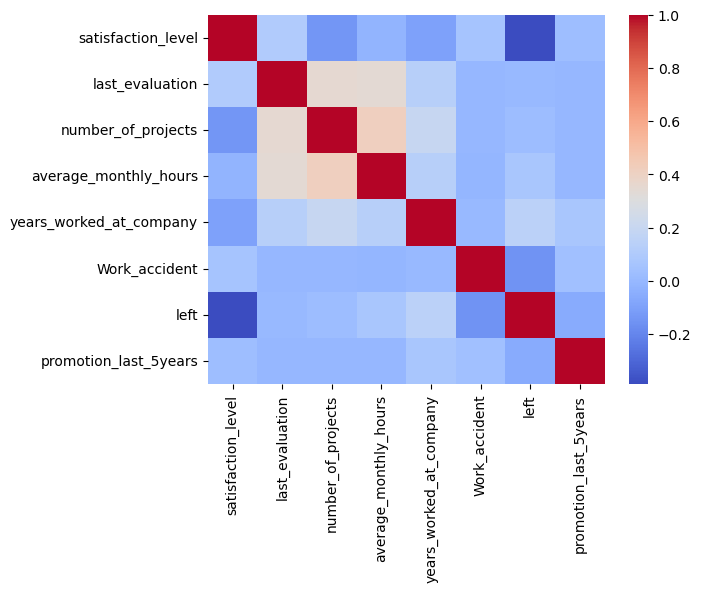

In [112]:
numerical_data = df.drop(columns = ['Department','salary'])
sns.heatmap(numerical_data.corr(), cmap = 'coolwarm')

##### There seems to be moderate correlation between rating at last evaluation, number of projects and monthly
##### Also there is very low correlation between satisfaction level and the employees who left

### Distribution of Satisfaction Level

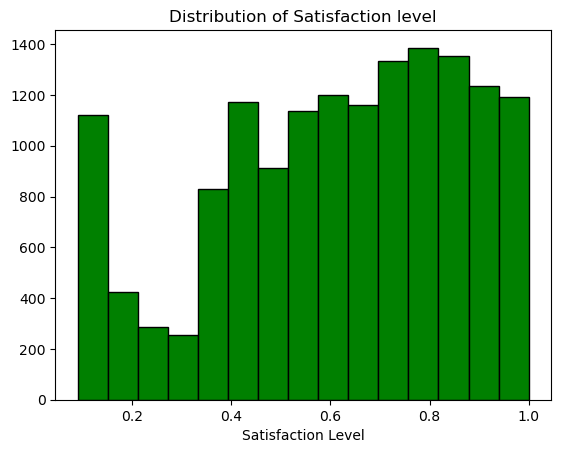

In [125]:
plt.hist(df['satisfaction_level'], color = 'green', ec = 'black', bins = 15)
plt.title("Distribution of Satisfaction level")
plt.xlabel("Satisfaction Level")
plt.show()

### Distribution of Employee Evaluation

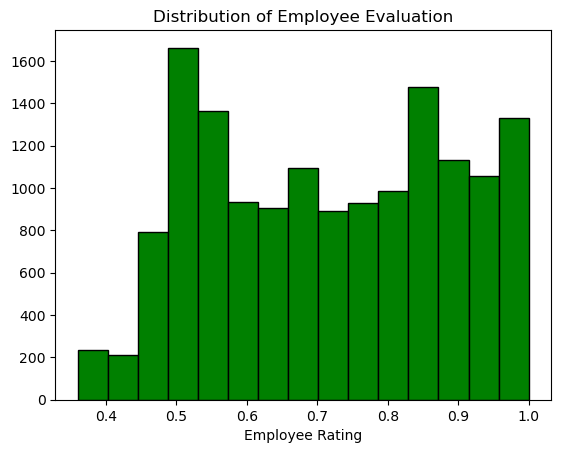

In [127]:
plt.hist(df['last_evaluation'], color = 'green', ec = 'black', bins = 15)
plt.title("Distribution of Employee Evaluation")
plt.xlabel("Employee Rating")
plt.show()

### Distribution of Average Monthly Hours

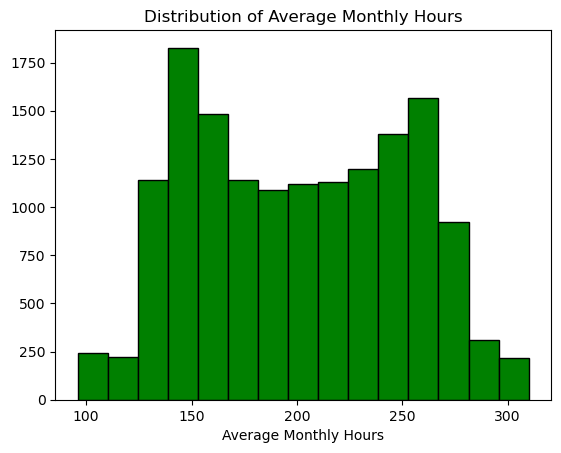

In [129]:
plt.hist(df['average_monthly_hours'], color = 'green', ec = 'black', bins = 15)
plt.title("Distribution of Average Monthly Hours")
plt.xlabel("Average Monthly Hours")
plt.show()

### Barplot of Employee Projects

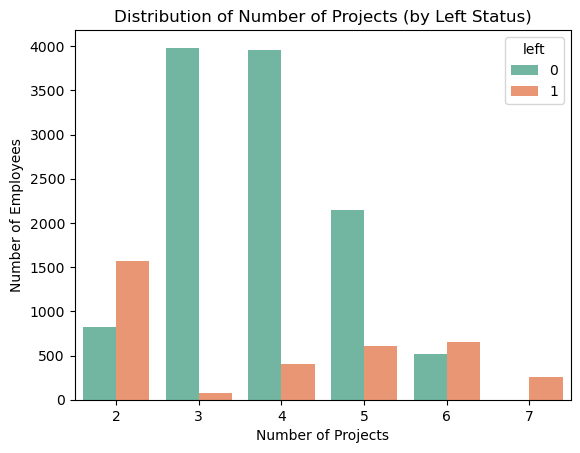

In [148]:
aggregated_data = df.groupby(['number_of_projects', 'left']).size().reset_index(name='count')

sns.barplot(data=aggregated_data, x='number_of_projects', y='count', hue='left', palette='Set2')
plt.title("Distribution of Number of Projects (by Left Status)")
plt.xlabel("Number of Projects")
plt.ylabel("Number of Employees")
plt.show()


#####  the chart suggests that employees with very few projects (e.g., 2 projects) and those with a high number of projects (e.g., 6 or 7 projects) are more prone to leaving (represented by the orange bars).

##### In contrast, employees with a moderate number of projects (e.g., 3 to 5 projects) seem to have a lower likelihood of leaving, as indicated by the much smaller orange bars compared to the teal bars in these ranges.

##### This pattern might point to employee dissatisfaction due to being underutilized (too few projects) or overburdened (too many projects).

In [151]:
df.head()

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,years_worked_at_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [153]:
df.to_csv("processed_dataset.csv", index = False)